In [63]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

pd.set_option('display.max_rows', 5)

In [69]:
!gdown --id 19ZnVu6agdLJdUI1fpfJXkwKZgt-cT8hR

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=19ZnVu6agdLJdUI1fpfJXkwKZgt-cT8hR
To: /content/data_test.csv
100% 1.47M/1.47M [00:00<00:00, 135MB/s]


In [70]:
df = pd.read_csv('/content/data_test.csv')
df.head()

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
0,103921,топор,лук,булава,лук,17.35,before
1,117214,посох,посох,лук,лук,21.84,before
2,115502,меч,посох,булава,топор,16.00,before
3,110102,булава,лук,лук,булава,17.22,before
4,104989,меч,посох,булава,посох,19.20,before


In [ ]:
df.tail()

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
19995,108834,посох,булава,лук,посох,26.37,after
19996,119941,посох,меч,лук,посох,23.73,after
19997,112911,топор,посох,булава,топор,27.73,after
19998,111684,меч,топор,посох,меч,24.20,after
19999,103437,лук,лук,булава,булава,22.83,after


In [ ]:
df.shape

(20000, 7)

In [ ]:
print(df['unit_1'].unique())
print(df['unit_2'].unique())
print(df['unit_3'].unique())
print(df['unit_4'].unique())

['топор' 'посох' 'меч' 'булава' 'лук']
['лук' 'посох' 'меч' 'булава' 'топор']
['булава' 'лук' 'меч' 'топор' 'посох']
['лук' 'топор' 'булава' 'посох' 'меч']


In [ ]:
weapons = ['топор', 'посох', 'меч', 'булава', 'лук']

In [ ]:
weapon_combinations = list(itertools.combinations_with_replacement(weapons, r=4))
weapon_combinations[:6]

[('топор', 'топор', 'топор', 'топор'),
 ('топор', 'топор', 'топор', 'посох'),
 ('топор', 'топор', 'топор', 'меч'),
 ('топор', 'топор', 'топор', 'булава'),
 ('топор', 'топор', 'топор', 'лук'),
 ('топор', 'топор', 'посох', 'посох')]

In [ ]:
len(weapon_combinations)

70

In [ ]:
df['weapons'] = list(zip(df['unit_1'], df['unit_2'], df['unit_3'], df['unit_4']))

In [ ]:
df.head()

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark,weapons
0,103921,топор,лук,булава,лук,17.35,before,"(топор, лук, булава, лук)"
1,117214,посох,посох,лук,лук,21.84,before,"(посох, посох, лук, лук)"
2,115502,меч,посох,булава,топор,16.00,before,"(меч, посох, булава, топор)"
3,110102,булава,лук,лук,булава,17.22,before,"(булава, лук, лук, булава)"
4,104989,меч,посох,булава,посох,19.20,before,"(меч, посох, булава, посох)"


In [ ]:
before = df[df['balance_mark'] == 'before']
after = df[df['balance_mark'] == 'after']

In [ ]:
mean_battle_duration_for_WC_before = []

for unique_weapon_combination in weapon_combinations:
    sum = 0
    count = 0
    for i, set_of_weapons in enumerate(before['weapons']):
        if sorted(unique_weapon_combination) == sorted(set_of_weapons):
            sum += before['len'][i]
            count += 1
    sum = sum / count
    mean_battle_duration_for_WC_before.append((unique_weapon_combination, sum))

In [ ]:
mean_battle_duration_for_WC_after = []

for unique_weapon_combination in weapon_combinations:
    sum = 0
    count = 0
    for i, set_of_weapons in enumerate(after['weapons']):
        if sorted(unique_weapon_combination) == sorted(set_of_weapons):
            sum += after['len'][10000 + i]
            count += 1
    sum = sum / count
    mean_battle_duration_for_WC_after.append((unique_weapon_combination, sum))

In [ ]:
mean_before = before['len'].mean()
mean_after = after['len'].mean()
print(mean_before, mean_after)

19.973604000000012 24.123114999999935


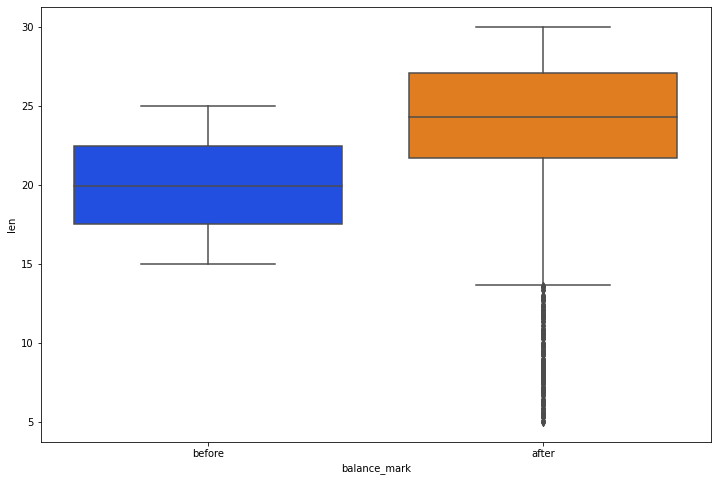

In [ ]:


plt.figure(figsize=(12, 8))
sns.boxplot(x='balance_mark', y='len', data=df, palette='bright')

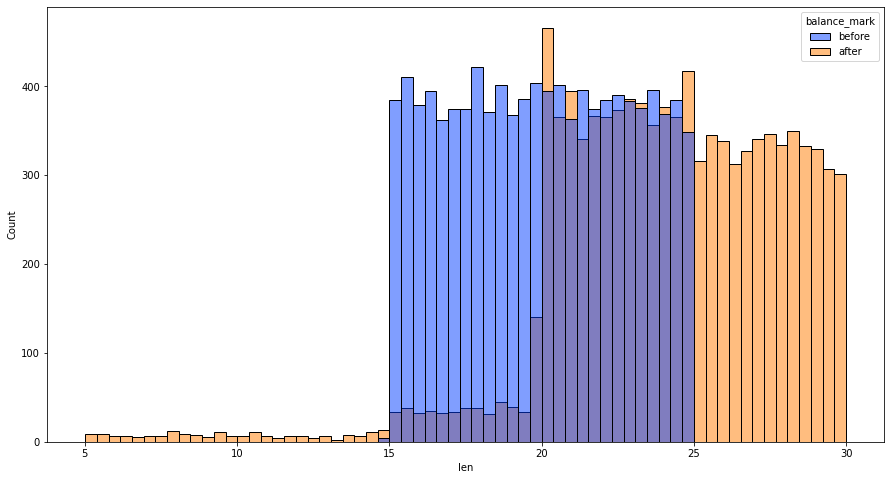

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(x='len', data=df, hue='balance_mark', palette='bright')

In [ ]:
var_before = before['len'].var()
var_after = after['len'].var()
print(var_before, var_after)

8.267486779862006 14.435283755150556


In [ ]:
mean_before_df = pd.DataFrame(data=mean_battle_duration_for_WC_before, columns=['weapons', 'mean_len'])
mean_after_df = pd.DataFrame(data=mean_battle_duration_for_WC_after, columns=['weapons', 'mean_len'])

In [ ]:
mean_after_df.head()

,weapons,mean_len
0,"(топор, топор, топор, топор)",19.969167
1,"(топор, топор, топор, посох)",24.732090
2,"(топор, топор, топор, меч)",20.576500
3,"(топор, топор, топор, булава)",20.086825
4,"(топор, топор, топор, лук)",24.986615


(array([[ 0.,  0.,  0.,  0.,  0.,  3., 66.,  1.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0., 14.,  0.,  0., 55.]]),
 array([ 9.97891192, 11.52702073, 13.07512953, 14.62323834, 16.17134715,
        17.71945596, 19.26756477, 20.81567358, 22.36378238, 23.91189119,
        25.46      ]),
 <a list of 2 Lists of Patches objects>)

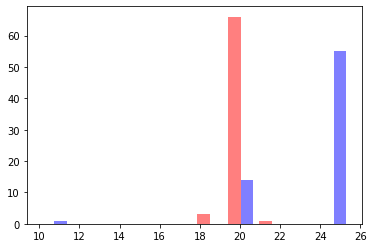

In [ ]:
plt.hist([mean_before_df['mean_len'], mean_after_df['mean_len']], color=['r','b'], alpha=0.5)

(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 2., 2., 2., 0., 6., 0., 4., 2., 1., 0., 4., 3., 3., 3., 7., 4.,
        5., 1., 1., 1., 3., 1., 0., 0., 3., 1., 0., 2., 1., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([18.518125, 18.5491  , 18.580075, 18.61105 , 18.642025, 18.673   ,
        18.703975, 18.73495 , 18.765925, 18.7969  , 18.827875, 18.85885 ,
        18.889825, 18.9208  , 18.951775, 18.98275 , 19.013725, 19.0447  ,
        19.075675, 19.10665 , 19.137625, 19.1686  , 19.199575, 19.23055 ,
        19.261525, 19.2925  , 19.323475, 19.35445 , 19.385425, 19.4164  ,
        19.447375, 19.47835 , 19.509325, 19.5403  , 19.571275, 19.60225 ,
        19.633225, 19.6642  , 19.695175, 19.72615 , 19.757125, 19.7881  ,
        19.819075, 19.85005 , 19

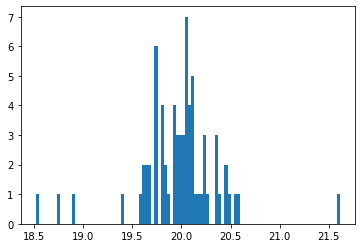

In [ ]:
plt.hist(mean_before_df['mean_len'], bins=100)

In [ ]:
len(mean_before_df), len(mean_after_df)

(70, 70)

In [ ]:
mean_df = pd.merge(mean_before_df, mean_after_df, on='weapons', suffixes=('_before', '_after'))
mean_df

,weapons,mean_len_before,mean_len_after
0,"(топор, топор, топор, топор)",18.891667,19.969167
1,"(топор, топор, топор, посох)",20.026418,24.732090
2,"(топор, топор, топор, меч)",20.082143,20.576500
3,"(топор, топор, топор, булава)",20.389500,20.086825
4,"(топор, топор, топор, лук)",19.963235,24.986615
5,"(топор, топор, посох, посох)",20.230200,24.991188
6,"(топор, топор, посох, меч)",19.801549,25.068834
7,"(топор, топор, посох, булава)",20.232557,25.265568
8,"(топор, топор, посох, лук)",20.104787,25.163665
9,"(топор, топор, меч, меч)",19.926022,19.954886


In [ ]:
mean_df['differences'] = mean_df.apply(lambda row: row.mean_len_after - row.mean_len_before, axis=1)
mean_df

,weapons,mean_len_before,mean_len_after,differences
0,"(топор, топор, топор, топор)",18.891667,19.969167,1.077500
1,"(топор, топор, топор, посох)",20.026418,24.732090,4.705672
2,"(топор, топор, топор, меч)",20.082143,20.576500,0.494357
3,"(топор, топор, топор, булава)",20.389500,20.086825,-0.302675
4,"(топор, топор, топор, лук)",19.963235,24.986615,5.023380
5,"(топор, топор, посох, посох)",20.230200,24.991188,4.760988
6,"(топор, топор, посох, меч)",19.801549,25.068834,5.267285
7,"(топор, топор, посох, булава)",20.232557,25.265568,5.033011
8,"(топор, топор, посох, лук)",20.104787,25.163665,5.058878
9,"(топор, топор, меч, меч)",19.926022,19.954886,0.028865
